   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


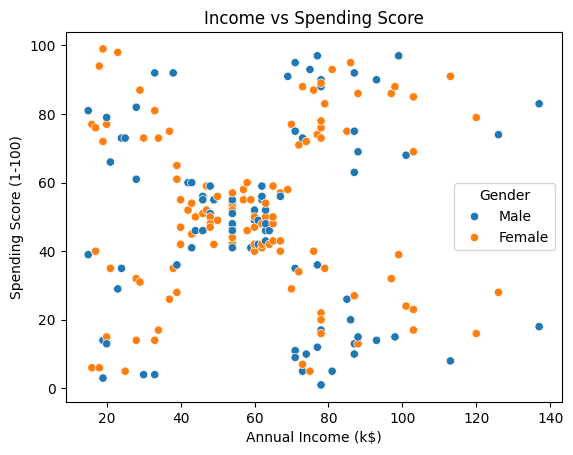

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load data
df = pd.read_csv('DataSets/Mall_Customers.csv')
print(df.head(5))

#Visualize relationship between icome and spending score
plt.Figure(figsize=(10,6))
sns.scatterplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()



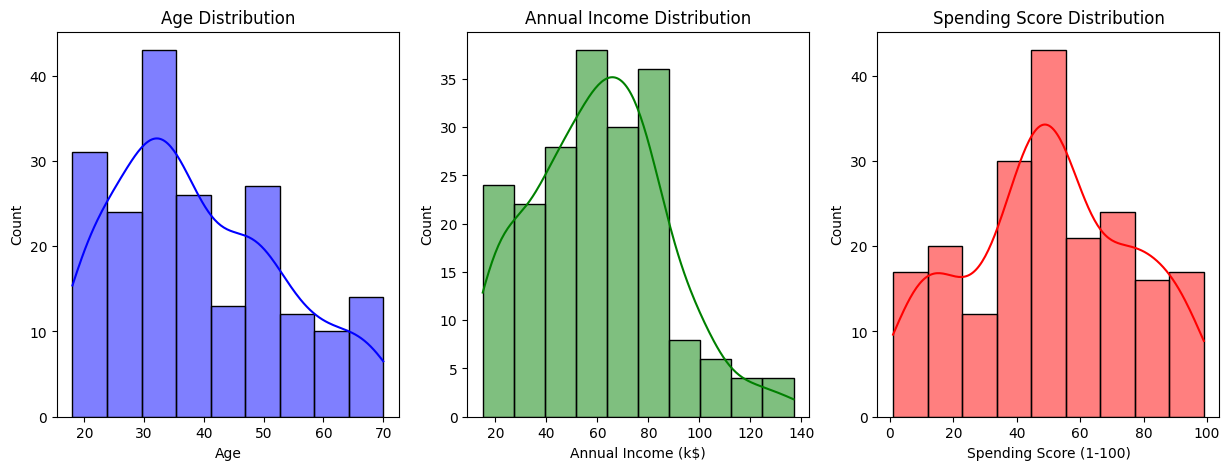

In [16]:
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

# Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.show()

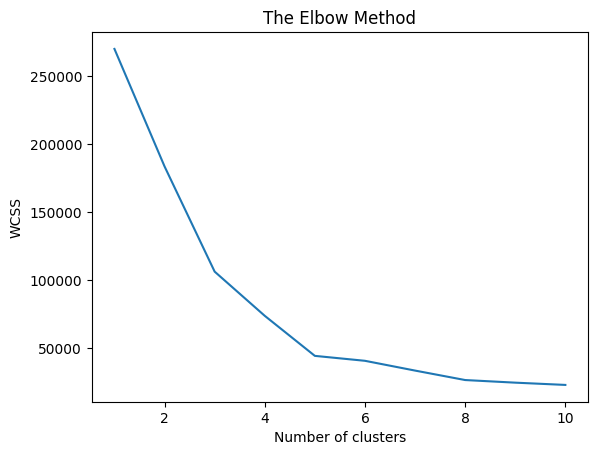

In [13]:
from sklearn.cluster import KMeans
# Cluster base on income and spending score
X = df.iloc[:,[3,4]].values
#Find the optimal number of cluster (Elbow Method)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

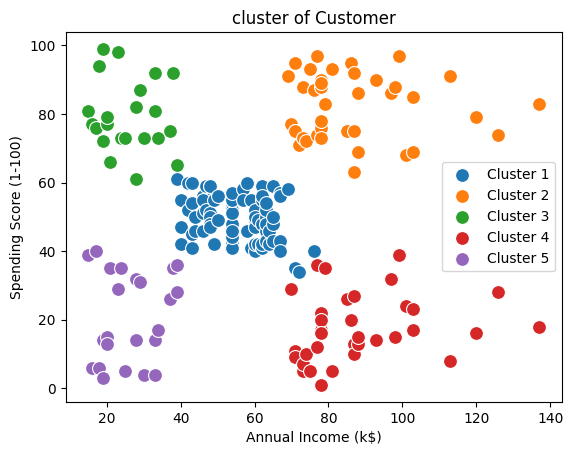

In [14]:
from sklearn.decomposition import PCA
# Apply kmeans with the chosen k (5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize
plt.Figure(figsize=(10,6))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], s=100, label='Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], s=100, label='Cluster 2')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], s=100, label='Cluster 3')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], s=100, label='Cluster 4')
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], s=100, label='Cluster 5')
plt.title('cluster of Customer')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

After performing K-Means clustering, we identified **5 distinct segments** of customers. Below are the tailored marketing strategies for each:

### 1. 💎 The "Target" Group (High Income, High Spending)
* **Profile:** High annual income and high spending score. These are your most valuable customers.
* **Strategy:** * Enroll them in an **Exclusive VIP Loyalty Program**.
    * Offer early access to new luxury collections or limited-edition products.
    * Provide personalized concierge services or premium packaging.

### 2. 💰 The "Careful" Group (High Income, Low Spending)
* **Profile:** High annual income but very low spending score.
* **Strategy:** * Focus on **Product Quality and Durability** in advertisements.
    * Send targeted newsletters highlighting "investment-worthy" items.
    * Offer "Spend $X, Get $Y" rewards to encourage higher basket sizes.

### 3. 🛍️ The "Average" Group (Middle Income, Middle Spending)
* **Profile:** Average income and average spending.
* **Strategy:** * Use **General Promotions** and seasonal sales (Black Friday, Summer Sale).
    * Market popular, trend-driven items that appeal to the masses.
    * Use email marketing to keep the mall "top of mind."

### 4. 🚀 The "Impulsive" Group (Low Income, High Spending)
* **Profile:** Low annual income but high spending score.
* **Strategy:** * Focus on **Flash Sales** and "Limited Time Offers."
    * Use social media influencers to trigger trend-based buying.
    * Offer "Buy Now, Pay Later" (BNPL) or installment-based payment options.

### 5. 📉 The "Frugal" Group (Low Income, Low Spending)
* **Profile:** Low income and low spending.
* **Strategy:** * Send **Deep Discount Coupons** and "Buy One Get One" (BOGO) deals.
    * Focus on "Value for Money" and budget-friendly basic essentials.
    * Highlight low-cost/entry-level items in store displays.

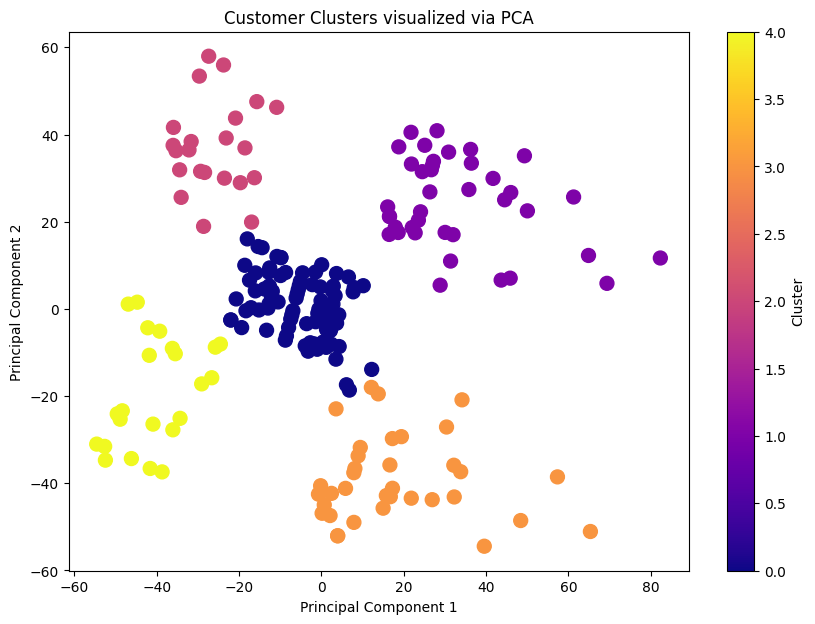

In [15]:
from sklearn.decomposition import PCA

# Reducing the data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='plasma', s=100)
plt.title('Customer Clusters visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()